
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('HealtyNormalized.csv',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1999943, 2)


,vsH,vbH
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [3]:
newdf = df.rename(columns={"vsH": "speed", "vbH": "vibration"})
print('Shape of data',newdf.shape)
newdf.head()

Shape of data (1999943, 2)


,speed,vibration
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


<AxesSubplot:>

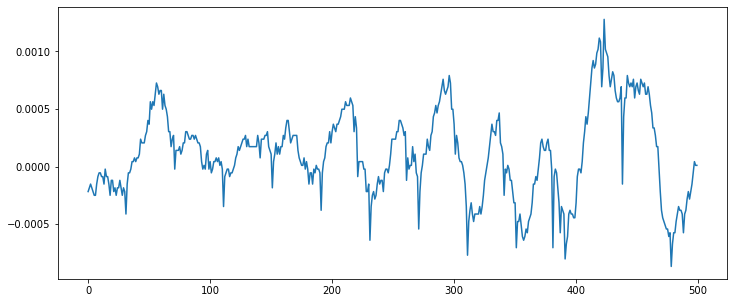

In [4]:
df = newdf.iloc[0:500]
#df = newdf
df['vibration'].plot(figsize=(12,5))

In [5]:
df.head()

,speed,vibration
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [6]:
df.tail()

,speed,vibration
495,0.000009,-0.000152
496,0.000969,-0.000055
497,0.001006,0.000043
498,0.001011,0.000010
499,0.001017,0.000010


In [7]:
df.head()

,speed,vibration
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [8]:
df.describe()

,speed,vibration
count,5.000000e+02,500.000000
mean,5.097425e-04,0.000108
std,5.005775e-04,0.000372
min,-7.401128e-07,-0.000868
25%,8.736350e-06,-0.000120
50%,4.111342e-04,0.000108
75%,1.011914e-03,0.000303
max,1.050055e-03,0.001278


## Step 2: Visualize the Data

<AxesSubplot:>

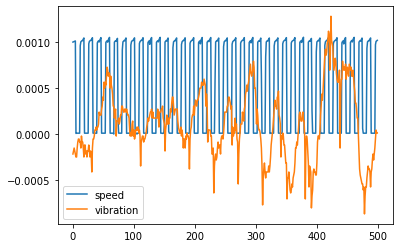

In [9]:
df.plot()

In [10]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(df['vibration'])

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(vibration):
    result=adfuller(vibration)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [13]:
adfuller_test(df['vibration'])

ADF Test Statistic : -3.7269345642139013
p-value : 0.003749856992592835
#Lags Used : 16
Number of Observations Used : 483
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

<AxesSubplot:>

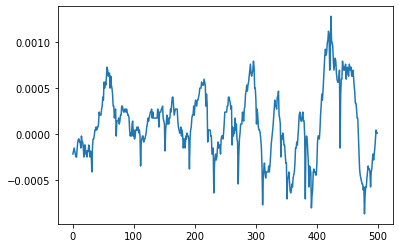

In [14]:
df['vibration'].plot()

## Auto Regressive Model
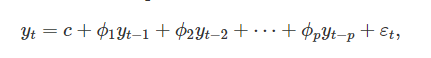

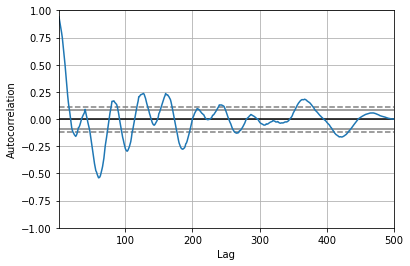

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['vibration'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

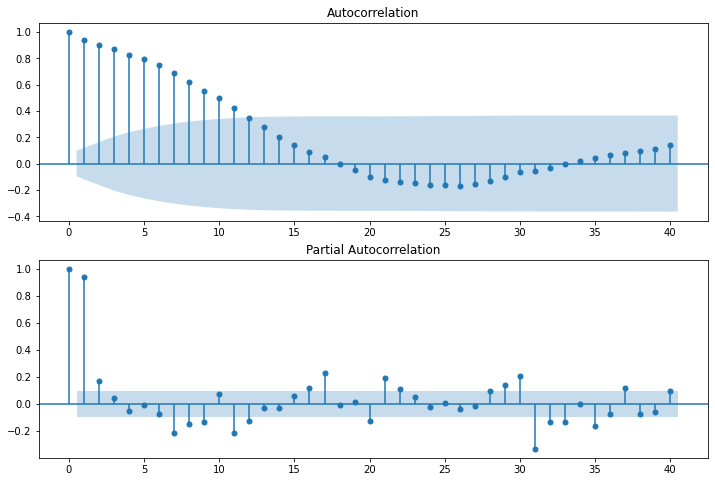

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['vibration'].iloc[100:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['vibration'].iloc[100:],lags=40,ax=ax2)

In [18]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model=ARIMA(df['vibration'],order=(1,1,0))
model_fit=model.fit()

C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.vibration   No. Observations:                  499
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3778.949
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 16 Mar 2021   AIC                          -7551.898
Time:                        18:01:01   BIC                          -7539.260
Sample:                             1   HQIC                         -7546.938
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               4.41e-07   4.68e-06      0.094      0.925   -8.73e-06    9.61e-06
ar.L1.D.vibration    -0.1904      0.044     -4.338      0.000      -0.276      -0.104
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.2508           +0.0000j            5.2508            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avai

<AxesSubplot:>

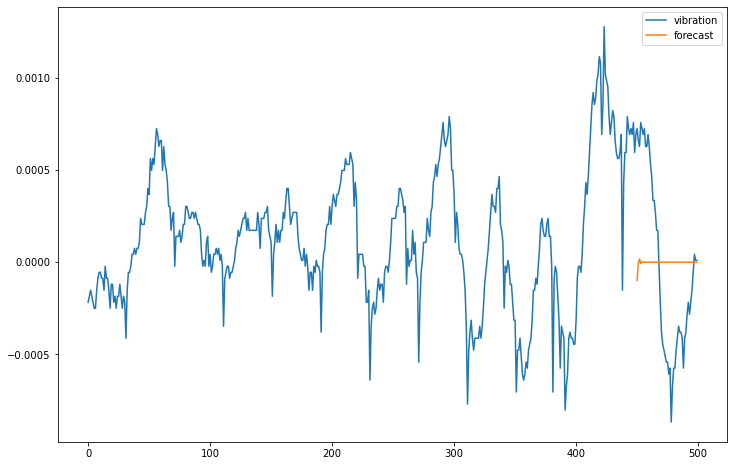

In [21]:
model=ARIMA(df['vibration'],order=(3,2,3))
model_fit=model.fit()

model_fit.summary()

df['forecast']=model_fit.predict(start=450,end=499,dynamic=True)
df[['vibration','forecast']].plot(figsize=(12,8))

In [22]:
import time
from numpy import asarray
time.sleep(2)
i = -1
results = []
pval = []
dval = []
qval = []

for p in range(5):
   # print("q: " + str(q))
    for d in range(4):
        #print("d: " + str(d))
        for q in range(2):
            i+=1
            print("i: " + str(i) + " , p: " + str(p) + " , d: " + str(d) + " , q: " + str(q))
            model=sm.tsa.statespace.SARIMAX(df['vibration'],order=(p,d, q),seasonal_order=(p,d,q,40))
            result = model.fit()
            results.append(result)
            pval.append(p)
            dval.append(d)
            qval.append(q)
            time.sleep(1)
            
            #model=sm.tsa.statespace.SARIMAX(df['vibration'],order=(p,d, q),seasonal_order=(p,d,q,40))
            #results=model.fit()

            #df['forecast']=results.predict(start=450,end=499,dynamic=True)
            #df[['vibration','forecast']].plot(figsize=(12,8)) , results

i: 0 , p: 0 , d: 0 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 1 , p: 0 , d: 0 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 2 , p: 0 , d: 1 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 3 , p: 0 , d: 1 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 4 , p: 0 , d: 2 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 5 , p: 0 , d: 2 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 6 , p: 0 , d: 3 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 7 , p: 0 , d: 3 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 8 , p: 1 , d: 0 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 9 , p: 1 , d: 0 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 10 , p: 1 , d: 1 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 11 , p: 1 , d: 1 , q: 1
i: 12 , p: 1 , d: 2 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 13 , p: 1 , d: 2 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 14 , p: 1 , d: 3 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 15 , p: 1 , d: 3 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 16 , p: 2 , d: 0 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 17 , p: 2 , d: 0 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 18 , p: 2 , d: 1 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 19 , p: 2 , d: 1 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 20 , p: 2 , d: 2 , q: 0
i: 21 , p: 2 , d: 2 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 22 , p: 2 , d: 3 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 23 , p: 2 , d: 3 , q: 1
i: 24 , p: 3 , d: 0 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 25 , p: 3 , d: 0 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 26 , p: 3 , d: 1 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 27 , p: 3 , d: 1 , q: 1
i: 28 , p: 3 , d: 2 , q: 0
i: 29 , p: 3 , d: 2 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 30 , p: 3 , d: 3 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 31 , p: 3 , d: 3 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 32 , p: 4 , d: 0 , q: 0
i: 33 , p: 4 , d: 0 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 34 , p: 4 , d: 1 , q: 0
i: 35 , p: 4 , d: 1 , q: 1


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 36 , p: 4 , d: 2 , q: 0


C:\Users\bahma\.conda\envs\svm\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i: 37 , p: 4 , d: 2 , q: 1


LinAlgError: LU decomposition error.

In [23]:
x = len(results)
plen = len(pval)
dlen = len(dval)
qlen = len(qval)

j = -1
for p in range(plen):
    
    print("q: " + str(p) + " , p: " + str(pval[p])+ " , d: " + str(dval[p])+ " , q: " + str(qval[p]) + " , results: " + str(results[p]))
    time.sleep(1)

q: 0 , p: 0 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359426CF10>
q: 1 , p: 0 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359428A970>
q: 2 , p: 0 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135942AD730>
q: 3 , p: 0 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359428A190>
q: 4 , p: 0 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135945D23D0>
q: 5 , p: 0 , d: 2 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135946280A0>
q: 6 , p: 0 , d: 3 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013594628F40>
q: 7 , p: 0 , d: 3 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013629085CD0>


q: 0 , p: 0 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359426CF10>


<ipython-input-24-c5aceba69920>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=results[q].predict(start=450,end=499,dynamic=True)


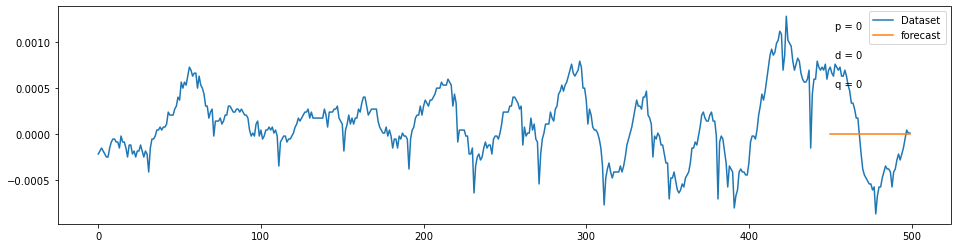

q: 1 , p: 0 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359428A970>


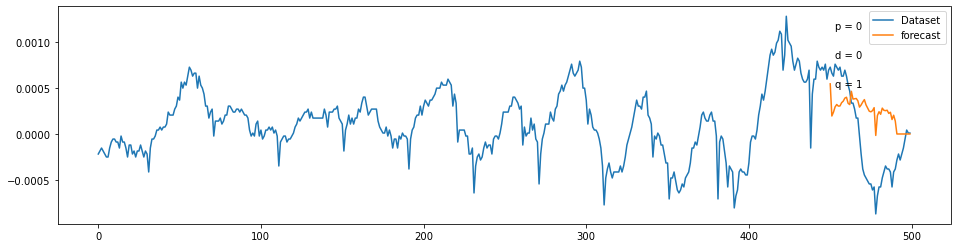

q: 2 , p: 0 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135942AD730>


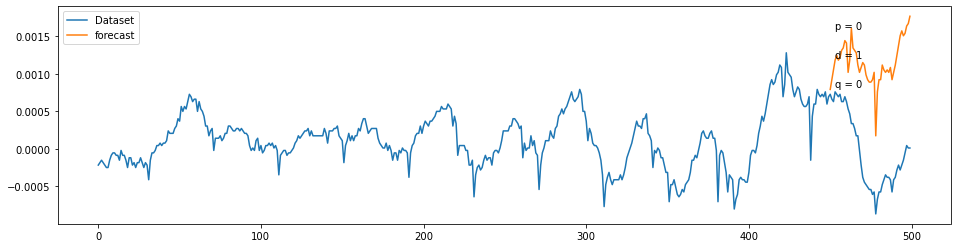

q: 3 , p: 0 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359428A190>


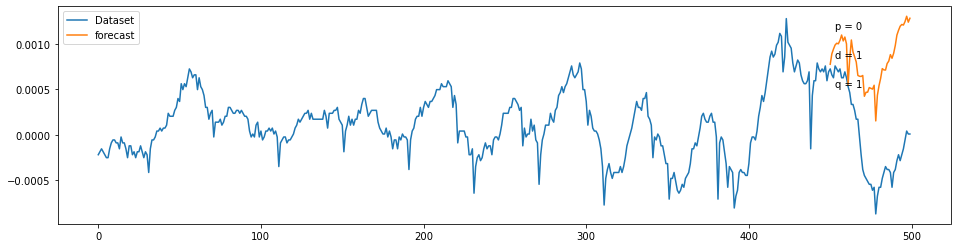

q: 4 , p: 0 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135945D23D0>


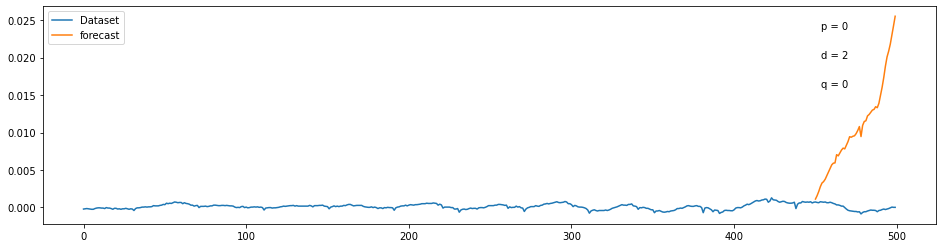

q: 5 , p: 0 , d: 2 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135946280A0>


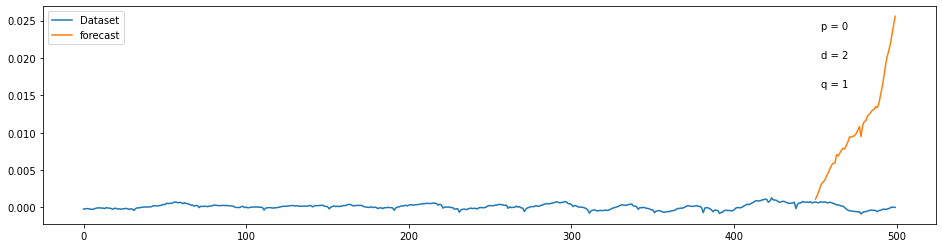

q: 6 , p: 0 , d: 3 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013594628F40>


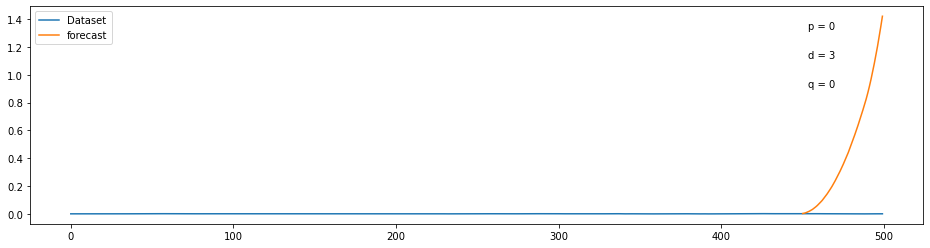

q: 7 , p: 0 , d: 3 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013629085CD0>


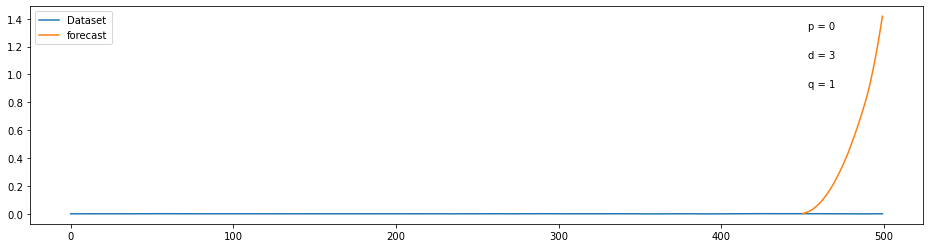

q: 8 , p: 1 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000136290A9AF0>


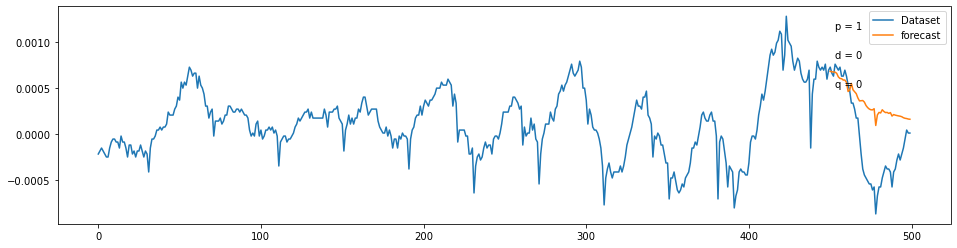

q: 9 , p: 1 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595568790>


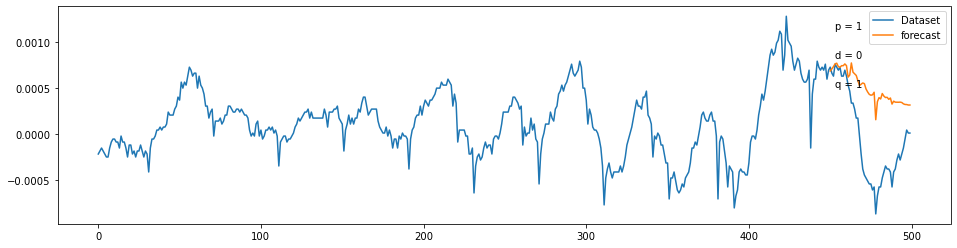

q: 10 , p: 1 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135955863D0>


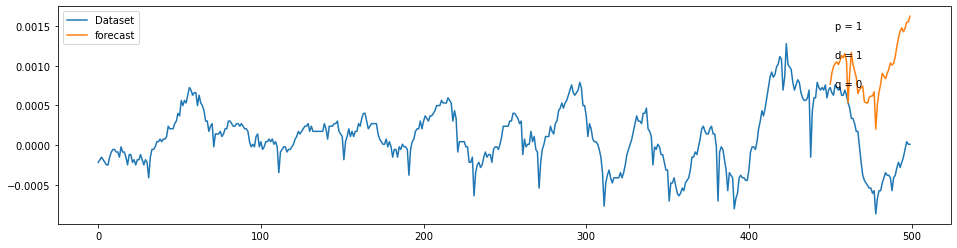

q: 11 , p: 1 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595586F40>


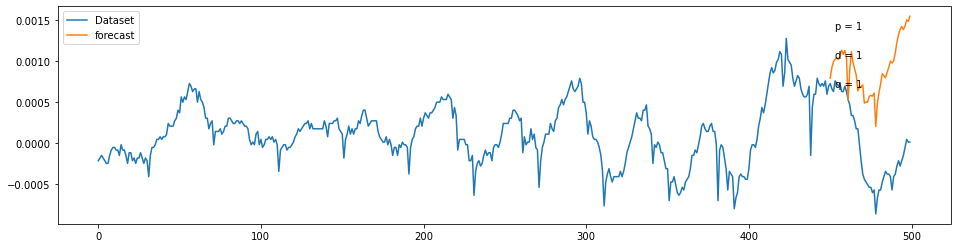

q: 12 , p: 1 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135955AF640>


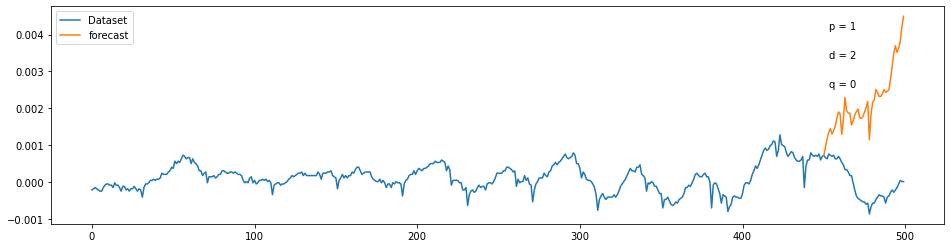

q: 13 , p: 1 , d: 2 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135955F3160>


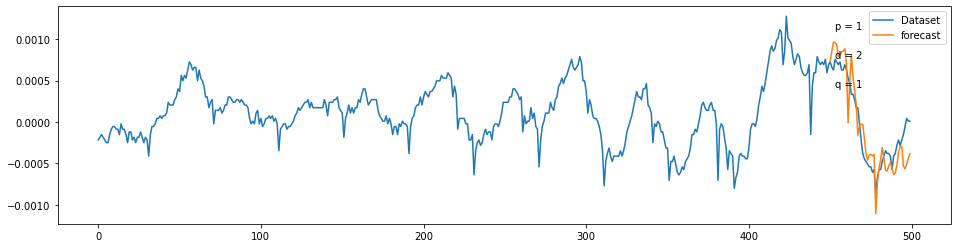

q: 14 , p: 1 , d: 3 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135955F3D90>


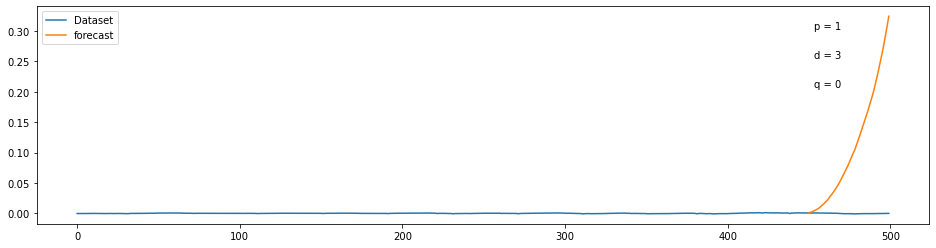

q: 15 , p: 1 , d: 3 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595631A60>


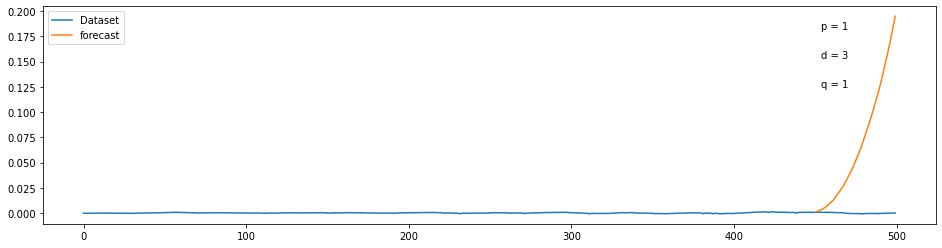

q: 16 , p: 2 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135958E38E0>


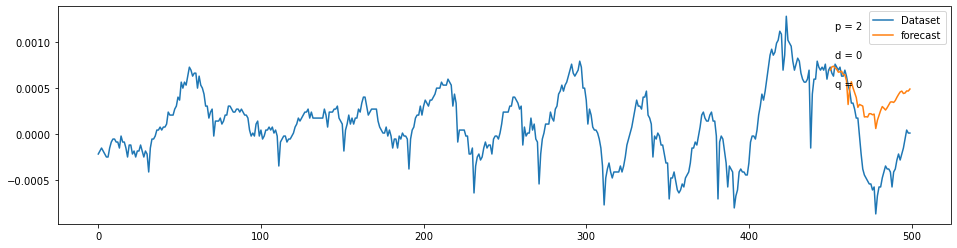

q: 17 , p: 2 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135958E39D0>


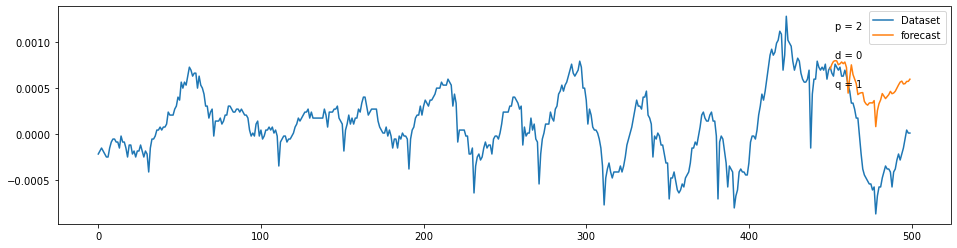

q: 18 , p: 2 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359592B190>


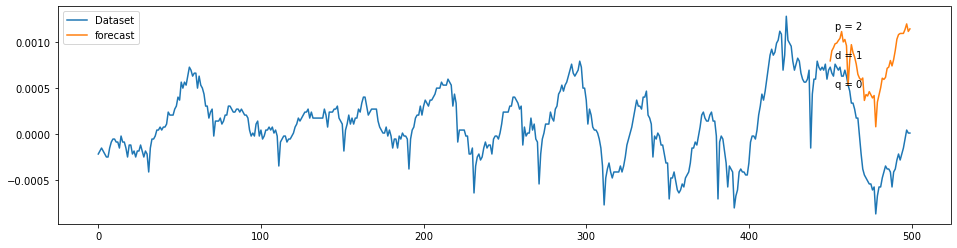

q: 19 , p: 2 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359592BF70>


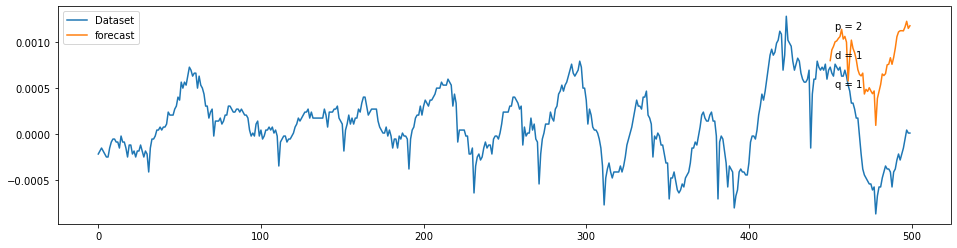

q: 20 , p: 2 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595951E20>


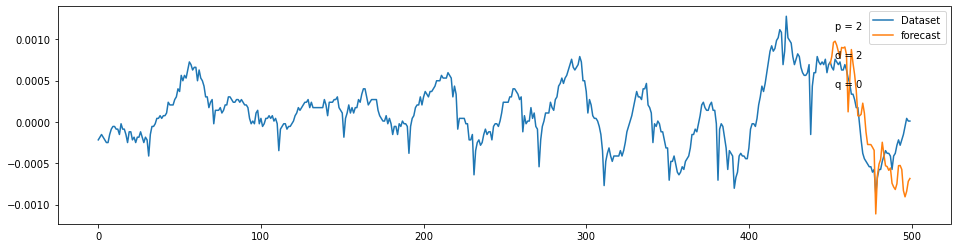

q: 21 , p: 2 , d: 2 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359647CBB0>


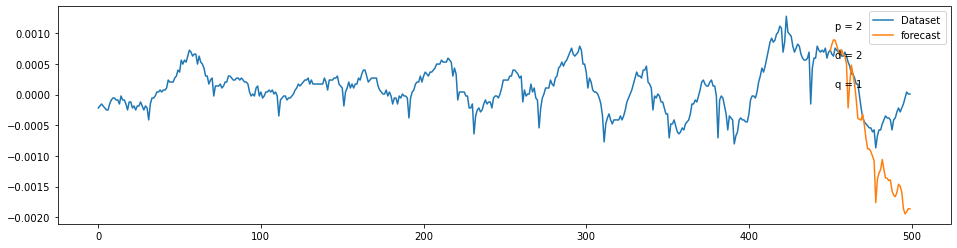

q: 22 , p: 2 , d: 3 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135964A27C0>


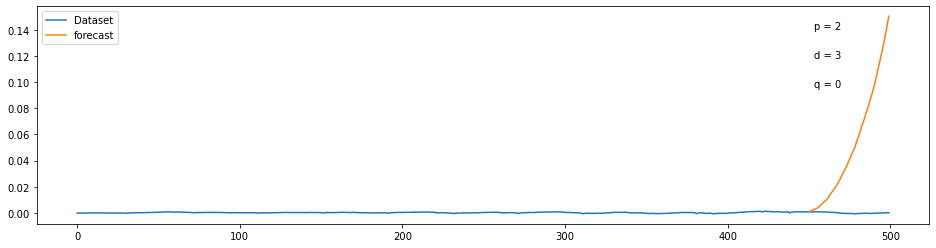

q: 23 , p: 2 , d: 3 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135964C75B0>


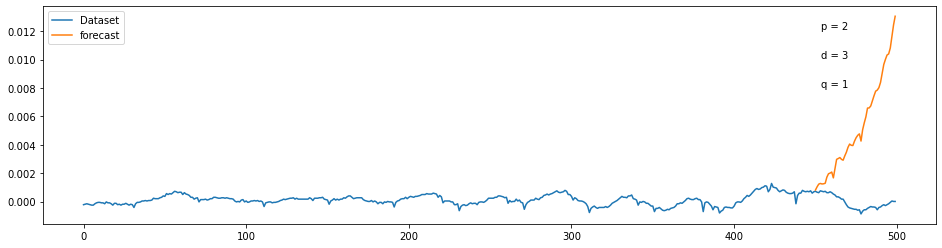

q: 24 , p: 3 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595951070>


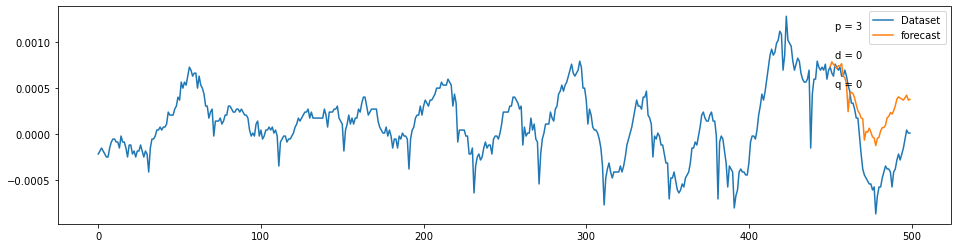

q: 25 , p: 3 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595152610>


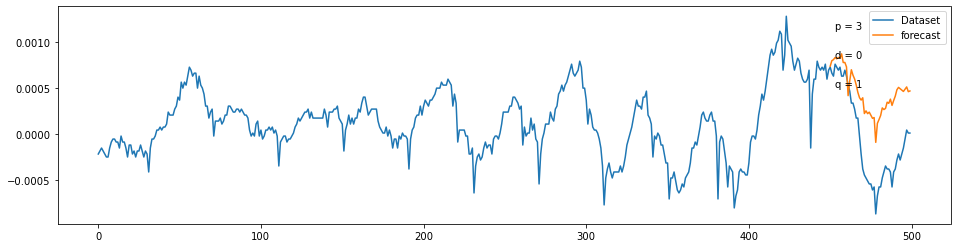

q: 26 , p: 3 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135954ED250>


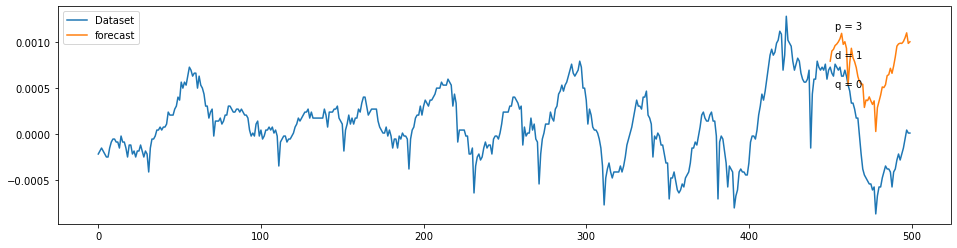

q: 27 , p: 3 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000135954EDEB0>


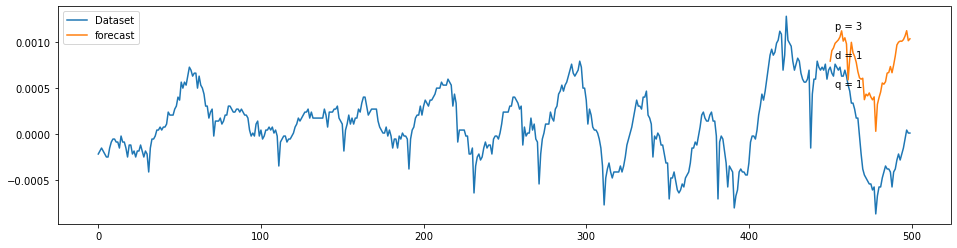

q: 28 , p: 3 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359552FC70>


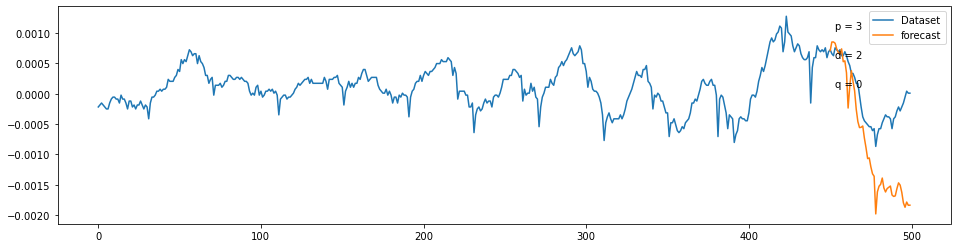

q: 29 , p: 3 , d: 2 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013596134790>


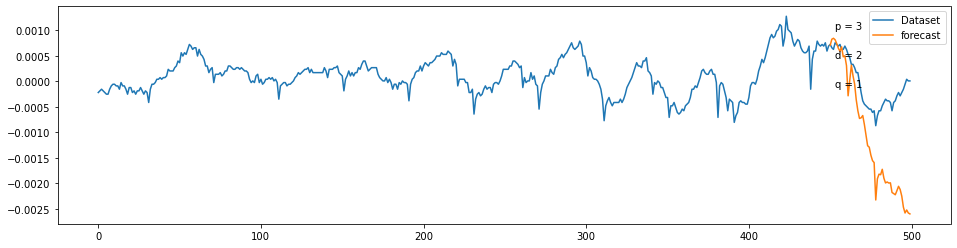

q: 30 , p: 3 , d: 3 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359552FB50>


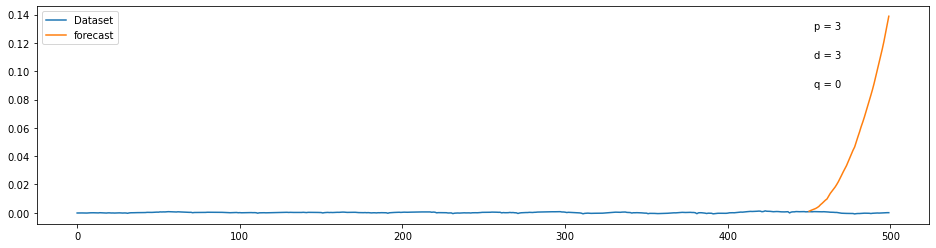

q: 31 , p: 3 , d: 3 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001359552FA90>


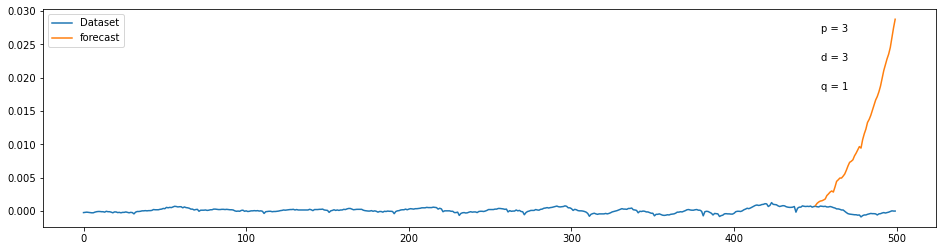

q: 32 , p: 4 , d: 0 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013596185FA0>


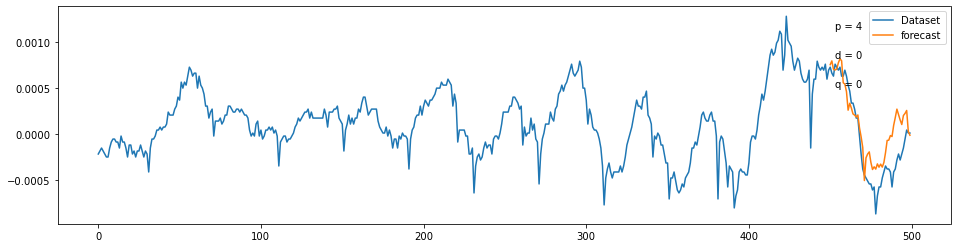

q: 33 , p: 4 , d: 0 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595B68D00>


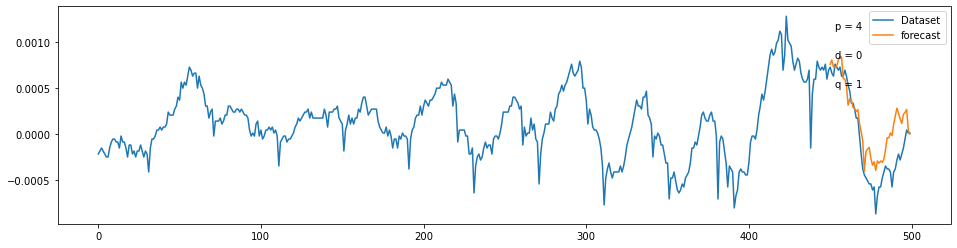

q: 34 , p: 4 , d: 1 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595B8CB20>


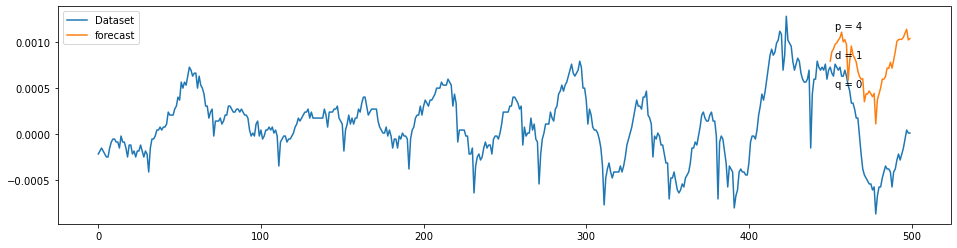

q: 35 , p: 4 , d: 1 , q: 1 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595CF2820>


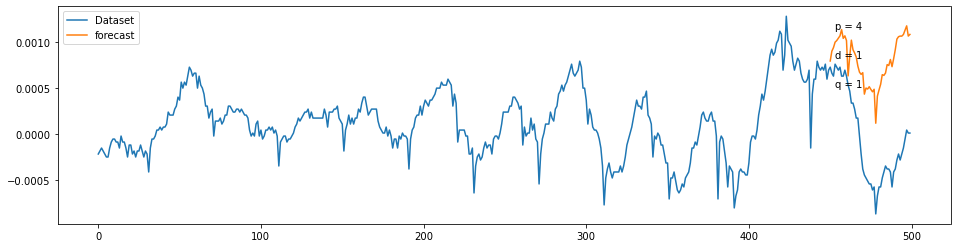

q: 36 , p: 4 , d: 2 , q: 0 , results: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000013595D1A340>


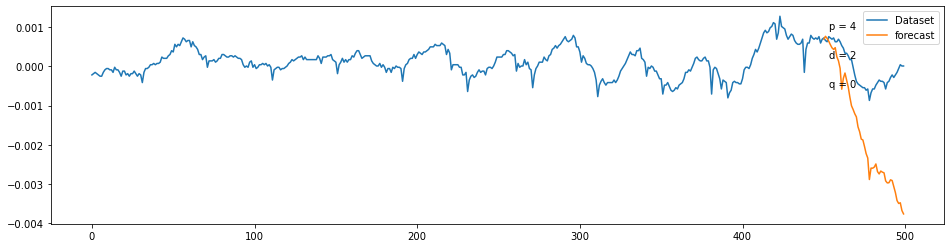

In [24]:
x = len(results)
j = -1
for q in range(x):
   
    print("q: " + str(q) + " , p: " + str(pval[q])+ " , d: " + str(dval[q])+ " , q: " + str(qval[q])+ " , results: " + str(results[q]))

    df['forecast']=results[q].predict(start=450,end=499,dynamic=True)
    # plot baseline and predictions
    plt.figure(figsize=(16, 4))
    #plt.plot(scaler.inverse_transform(dataset),label='Training data')
    plt.plot(df['vibration'], label='Dataset')
    plt.plot(df['forecast'], label='forecast')

    plt.figtext(.8, .8, "p = " + str(pval[q]) )
    plt.figtext( .8, .7,"d = " + str(dval[q]) )
    plt.figtext(.8, .6,"q = " + str(qval[q]) )

    plt.legend();
    plt.show()
    time.sleep(1)

#df['forecast']=results[23].predict(start=450,end=499,dynamic=True)
#df[['vibration','forecast']].plot(figsize=(12,8)) 
